-----------------------------
Curva ROC y el AUC en Python
-----------------------------
A continuación, se muestra un ejemplo completo utilizando un modelo de regresión logística
en un pequeño conjunto de datos de prueba con la librería sklearn para mostrar el AUC.

Sin entrenar: ROC AUC=0.500

Regresión Logística: ROC AUC=0.903


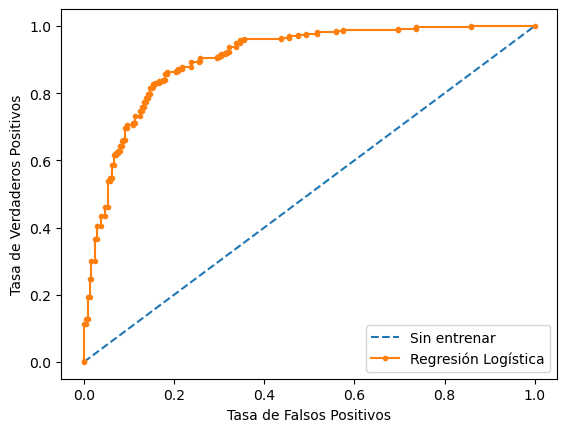

In [23]:
print("-----------------------------")
print("Curva ROC y el AUC en Python")
print("-----------------------------")

print("A continuación, se muestra un ejemplo completo utilizando un modelo de regresión logística")
print("en un pequeño conjunto de datos de prueba con la librería sklearn para mostrar el AUC.")
print("")

#Importamos
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Generamos un dataset de dos clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)


#Generamos un clasificador sin entrenar , que asignará 0 a todo 
ns_probs = [0 for _ in range(len(testy))]

# Entrenamos nuestro modelo de reg log 
model = LogisticRegression(solver='lbfgs') 
model.fit(trainX, trainy)

# Predecimos las probabilidades 
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1) 
lr_probs = lr_probs[:, 1]


# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs) 
lr_auc = roc_auc_score(testy, lr_probs)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc)) 
print("")
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs) 
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar') 
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos') 
pyplot.ylabel('Tasa de Verdaderos Positivos') 
pyplot.legend()
pyplot.show()

-----------------------------
Curvas de precisión-sensibilidad en Python
-----------------------------
Regresión Logística: f1=0.841 auc=0.898


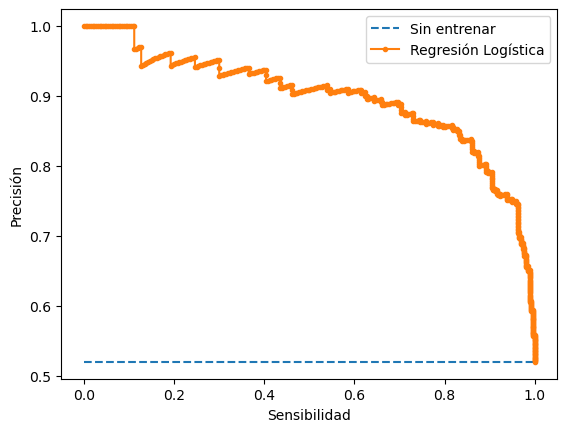

In [27]:
print("-----------------------------")
print("Curvas de precisión-sensibilidad en Python")
print("-----------------------------")


from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

#Generamos dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

#Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2) #Entrenamos
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predecimos probabilidades
lr_probs = model.predict_proba(testX)

# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]

# Sacamos los valores
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar') 
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística') #Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

-----------------------------
Modelo de datos desbalanceados con Curva ROC
-----------------------------
Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.716


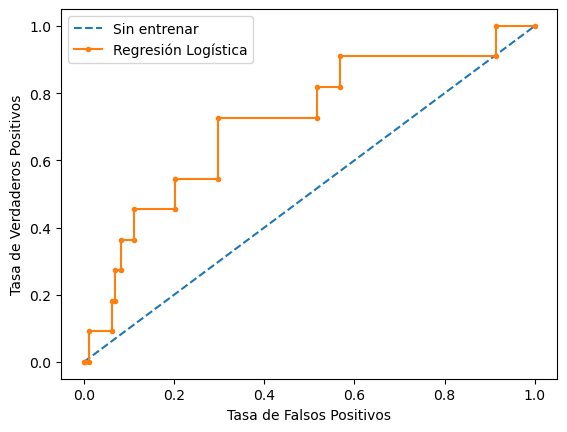

In [33]:
print("-----------------------------")
print("Modelo de datos desbalanceados con Curva ROC")
print("-----------------------------")

#Importamos
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Generamos un dataset de dos clases (desbalanceadas en un 99:1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)

# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2) #Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]

# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1) 
lr_probs = lr_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar') 
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

-----------------------------
Modelo de datos desbalanceados con curva de precisión-sensibilidad
-----------------------------
Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.716


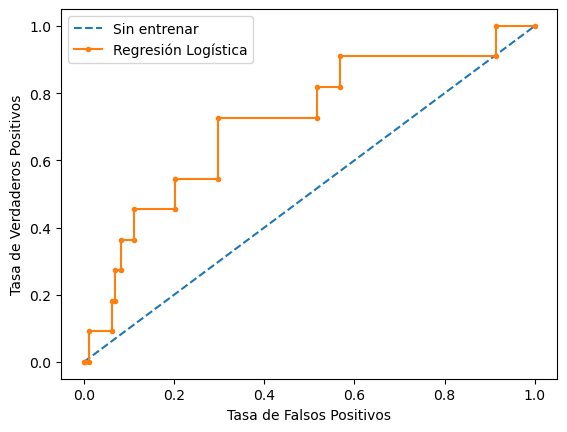

Regresión Logística: f1=0.000 auc=0.054


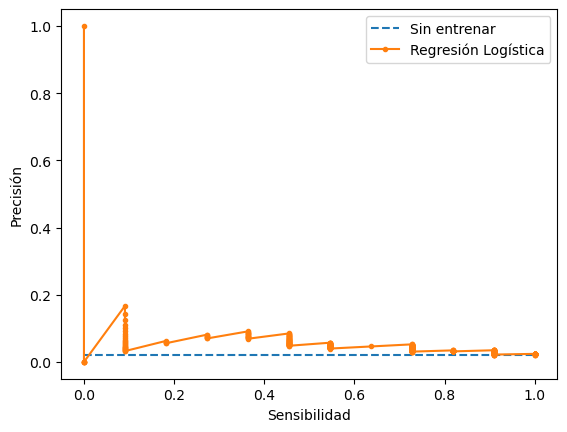

In [37]:
print("-----------------------------")
print("Modelo de datos desbalanceados con curva de precisión-sensibilidad")
print("-----------------------------")


#Importamos
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Generamos un dataset de dos clases (desbalanceadas en un 99:1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)

# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2) #Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]

# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1) 
lr_probs = lr_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar') 
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()


yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# Pintamos la curva de precision-sensibilidad curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar') 
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística') #Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()